# Iris TensorFlow

This notebook illustrates using tensorflow for classifying the iris dataset.

## Loading The Data 

First we load the dataset into a ``pandas.DataFrame``.

In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import KFold, cross_val_score
from ibex.tensorflow.contrib.keras.wrappers.scikit_learn import KerasClassifier as PdKerasClassifier
import tensorflow
import seaborn as sns
sns.set_style('whitegrid')

from ibex.sklearn import ensemble as pd_ensemble

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
iris = datasets.load_iris()
features = iris['feature_names']
iris = pd.DataFrame(
    np.c_[iris['data'], iris['target']], 
    columns=features+['class'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0



## Building And Operating The Estimator

As usual with tensorflow/keras, We need to write a function building a model.

In [5]:
def buid_nn():
    np.random.seed(7)
    model = tensorflow.contrib.keras.models.Sequential()
    model.add(tensorflow.contrib.keras.layers.Dense(8, input_dim=4, activation='relu'))
    model.add(tensorflow.contrib.keras.layers.Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

buid_nn()

Now we build a `PdKerasClassifier`. Note the use of `classes`: we need to list the classes of the dependent variable.

In [6]:
estimator = PdKerasClassifier(
    build_fn=buid_nn, 
    classes=iris['class'].unique(), 
    epochs=200, 
    batch_size=5, 
    verbose=0)

Following `sklearn` conventsions, following a call to `fit`, the `History` object describing the fit is accessible via a `history_` attribute.

In [9]:
estimator.fit(iris[features], iris['class']).history_

## Evaluating Performance

In [10]:
kfold = KFold(n_splits=10, shuffle=True)

scores = cross_val_score(estimator, iris[features], iris['class'], cv=kfold)
scores

array([ 1.        ,  1.        ,  1.        ,  1.        ,  0.93333333,
        0.93333333,  1.        ,  0.93333333,  0.93333333,  1.        ])

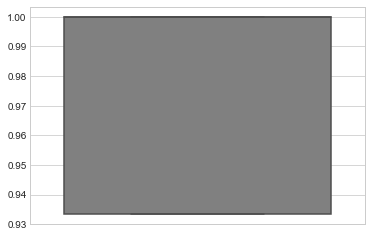

In [11]:
sns.boxplot(x=scores, color='grey', orient='v');
ylabel('classification score (mismatch)')
figtext(
    0, 
    -0.1, 
    'Classification scores for tensorflow/keras on the Iris dataset.');